In [ ]:
# From Faribis paper
# Minority Fraction = 0.2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/CSH Network Simulation ") #changing working directory to google drive

In [3]:
!pip install networkx
!pip install EoN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120791 sha256=b54ce418203f02a94e51468d03d2665dd50fe79b9daa1f4e9565eb1e5b20ef44
  Stored in directory: /root/.cache/pip/wheels/cc/38/06/01956d0db50e69cbcd6752d4b362685690c4fc17a80674bf18
Successfully built EoN


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
import EoN

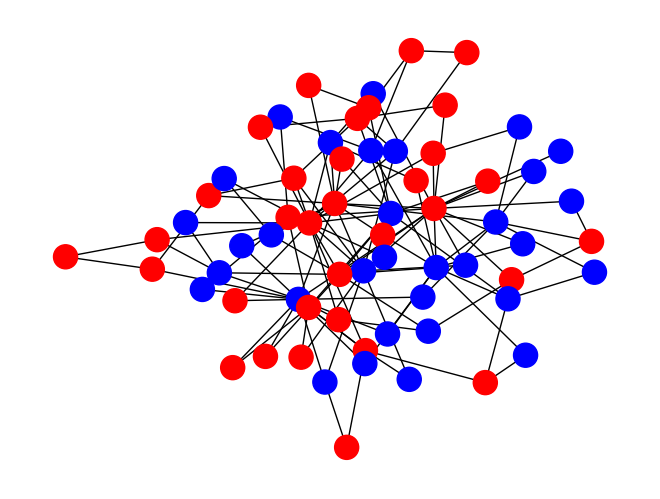

In [5]:
G=nx.barabasi_albert_graph(65, 2) #create a barabasi-albert graph.
color_map =[]
#It is a preferential attachemnt network model with 50 is number of nodes and 2 is edges each new nodes comewith
for i in range(65):
  if i%2==0:
    color_map.append("red")
  else:
    color_map.append("blue")
#print(G)
nx.draw(G, node_color=color_map)
plt.show()


In [6]:
tmax = 20
iterations = 5 #run 5 simulations
tau = 0.1 #transmission rate
gamma = 1.0 #recovery rate
#rho = 0.005 #random fraction initially infected

In [7]:
#For Complex Contagion
#https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.Gillespie_complex_contagion.html#EoN.Gillespie_complex_contagion
#https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks
#https://arxiv.org/pdf/2001.02436.pdf

In [8]:
#This function needs to return the rate at which a node chnages status. For the model we are assuming, its returning 1 if the node has atleast 2 infected connection and O otherwise
#The threshold is provided in the tuple parameter
#def transition_rate(G, node, status, parameters):
  #r = parameters[0] #threshold
  #if status[node]=="S" and len ([nbr for nbr in G.neighbors(node) if status[nbr]=="I"])>=r: #if a node is susceptible and have atleast "r" infected parameters.
    #return 1
  #else:
    #return 0

In [9]:
#This function needs to return the rate at which a node chnages status. For the model we are assuming, its returning 1 if the node has atleast 2 infected connection and O otherwise
#The threshold is provided in the tuple parameter
def transition_rate(G, node, status, parameters):
  r = parameters[0] #threshold
  #if status[node]=="S" and len ([nbr for nbr in G.neighbors(node) if status[nbr]=="I"])>=r: #if a node is susceptible and have atleast "r" infected parameters.
  # and two randomly slecetled nodes status is I
  if status[node]=="S" and np.random.choice(list(G.neighbors(node)))=="I" and np.random.choice(list(G.neighbors(node)))=="I":
    return 1
  else:
    return 0

In [10]:
#This functions returns the new status of node. At this time, we are already calculating it in the last function.
#But this function can be expanded to include other transition status.
#for this model, S are turning to I and existing I remains I.
def transition_choice(G, node, status, parameters):
  return "I"

In [11]:
#This function returns a set containing all the nodes who might chnage because of a node may have chnage its status. For example, if a S becomes I, then any node nears the I whcih is S might chnage.
# for this model only node a node might are affect are susceptibles neighbors.
def get_influence_set(G, node, status, parameters):
  return [nbr for nbr in G.neighbors(node) if status[nbr]=="S"]

In [12]:
parameter = (2,)# This is the threshold.

In [13]:
#print(G.nodes())
node_list = list(G.nodes())
tot_nodes = max(node_list)+1
print(tot_nodes)

65


In [14]:
rho = 0.5
infect = 0
counter = 0
#G.nodes(data=True) #gets all the node and its attributes
IC = defaultdict(lambda: "S") #This is the initial state of the nodes.
while infect <= rho:
  a=np.random.randint(1,tot_nodes)
  if color_map[a]=="red": # for the first time it has be to red which is minority
    IC[a]="I"
    n= G.neighbors(a)
    n_list= list(n)
    print(n_list)
    for neighbor in n_list:
      IC[neighbor]="I"
    counter = counter+1+len(n_list)
    print (counter)
    infect = (counter/tot_nodes)
    print(infect)
  else:
    1

[18, 6]
3
0.046153846153846156
[16, 47]
6
0.09230769230769231
[5, 6, 27]
10
0.15384615384615385
[3, 4, 8, 9, 11, 12, 14, 15, 16, 21, 24, 25, 41, 52, 63, 64]
27
0.4153846153846154
[17, 28, 61]
31
0.47692307692307695
[5, 6, 26, 50, 56, 57]
38
0.5846153846153846


doing Gillespie simulation
done with simulation, now plotting


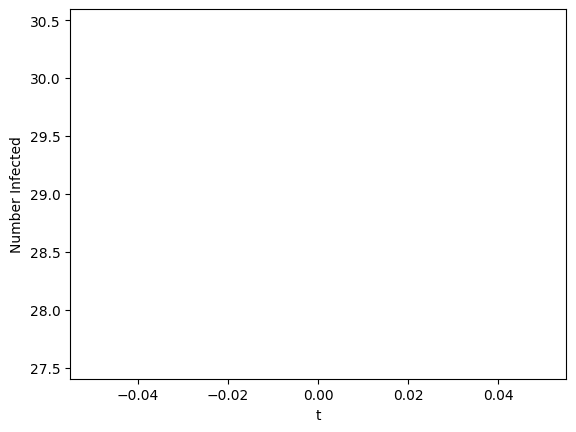

In [15]:
# Once the initial states of all the nodes have been determined, then we do Gillepsie Simulation
print("doing Gillespie simulation")
t, S, I = EoN.Gillespie_complex_contagion(G, transition_rate,transition_choice, get_influence_set, IC, return_statuses = ("S", "I"),parameters = parameter)
print("done with simulation, now plotting")
plt.plot(t, I, c="red")
plt.xlabel("t")
plt.ylabel("Number Infected")
plt.show()

In [ ]:
# For Record Keeping Purposes
#rho = 0.5
#infect = 0
#counter = 0
#G.nodes(data=True) #gets all the node and its attributes
#IC = defaultdict(lambda: "S") #This is the initial state of the nodes.
#while infect <= rho:
  #print(infect)
  #print(counter/tot_nodes)
  #a=np.random.randint(1,tot_nodes)
  #print(a)
  #if counter == 0 and color_map[a]=="red": # for the first time it has be to red which is minority
    #IC[a]="I"
  #else:
    #IC[a] = "I" # It can be any color after the first time
  #counter += 1
  #infect = (counter/tot_nodes)
  #print(infect)
# Once the initial states of all the nodes have been determined, then we do Gillepsie Simulation
  #print("doing Gillespie simulation")
  #t, S, I = EoN.Gillespie_complex_contagion(G, transition_rate,transition_choice, get_influence_set, IC, return_statuses = ("S", "I"),parameters = parameter)
  #print("done with simulation, now plotting")
  #plt.plot(t, I)
#plt.xlabel("t")
#plt.ylabel("Number Infected")
#plt.show()